In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('jobs.csv')
print(df.shape)

# counting null values 
df.isnull().sum()

(11825, 4)


Titles         0
Company        0
Location       0
Salary      8883
dtype: int64

Dropping all null values, which is a considerable portion of the dataframe.

In [4]:
df.dropna(inplace=True)
print(df.shape)
df[:4]

(2942, 4)


,Titles,Company,Location,Salary
0,Data Scientist,Apex Life Sciences,Pittsburgh,['$15 - $17 an hour']
1,Medicare Insurance Agent – Industry-best comp ...,ASSURANCE Independent Agents,Pittsburgh,"['$50,000 - $125,000 a year']"
4,"Data Scientist - Python, Machine Learning",CyberCoders,Pittsburgh,"['$130,000 - $150,000 a year']"
15,Data Scientist I/II,United States Steel,Pittsburgh,"['$104,000 - $154,000 a year']"


In [8]:
# counting duplicates
df.duplicated().sum()

2129

In [9]:
# Dropping all duplicates
df.drop_duplicates(['Company', 'Location', 'Titles'], inplace=True)

In [20]:
# ONLY INCLUDING ANNUAL SALARIES. THIS WILL RID THE DATAFRAME OF HOURLY INTERNSHIPS OR MONTHLY PROGRAMS
df = df[df.Salary.str.contains('year')]

In [22]:
print(df.dtypes)
df[:3]

Titles      object
Company     object
Location    object
Salary      object
dtype: object


,Titles,Company,Location,Salary
1,Medicare Insurance Agent – Industry-best comp ...,ASSURANCE Independent Agents,Pittsburgh,"['$50,000 - $125,000 a year']"
4,"Data Scientist - Python, Machine Learning",CyberCoders,Pittsburgh,"['$130,000 - $150,000 a year']"
15,Data Scientist I/II,United States Steel,Pittsburgh,"['$104,000 - $154,000 a year']"


In [23]:
# converting salary to string type
df['New Salary'] = df.Salary.apply(lambda x: str(x))

1         ['$50,000 - $125,000 a year']
4        ['$130,000 - $150,000 a year']
15       ['$104,000 - $154,000 a year']
18        ['$83,000 - $123,000 a year']
19        ['$82,000 - $121,000 a year']
20       ['$108,000 - $159,000 a year']
21        ['$97,000 - $143,000 a year']
22       ['$101,000 - $148,000 a year']
23        ['$78,000 - $115,000 a year']
25         ['$29,950 - $32,750 a year']
28         ['$45,000 - $55,000 a year']
36        ['$92,000 - $136,000 a year']
39        ['$97,000 - $143,000 a year']
63        ['$82,000 - $123,000 a year']
75         ['$35,100 - $56,784 a year']
112        ['$55,000 - $60,000 a year']
113        ['$23,868 - $37,752 a year']
121       ['$99,000 - $132,000 a year']
124       ['$97,000 - $137,000 a year']
127      ['$127,000 - $179,000 a year']
174       ['$71,000 - $106,000 a year']
231       ['$94,000 - $141,000 a year']
240      ['$104,000 - $137,000 a year']
243       ['$74,000 - $100,000 a year']
306       ['$91,000 - $134,000 a year']


In [36]:
df[['salary_low_bound', 'salary_high_bound']] = df.Salary.str.split('-', expand=True)

In [37]:
df[:4]

,Titles,Company,Location,Salary,salary_low_bound,salary_high_bound
1,Medicare Insurance Agent – Industry-best comp ...,ASSURANCE Independent Agents,Pittsburgh,"['$50,000 - $125,000 a year']","['$50,000","$125,000 a year']"
4,"Data Scientist - Python, Machine Learning",CyberCoders,Pittsburgh,"['$130,000 - $150,000 a year']","['$130,000","$150,000 a year']"
15,Data Scientist I/II,United States Steel,Pittsburgh,"['$104,000 - $154,000 a year']","['$104,000","$154,000 a year']"
18,Data Scientist,International Services Management,Pittsburgh,"['$83,000 - $123,000 a year']","['$83,000","$123,000 a year']"


In [61]:
# properly formatting and putting salary into integers
def format_lower_bound(row):
    salary = row.salary_low_bound.replace("$", "").replace("[", "").replace("'", "").replace(",", "")
    return(int(salary))

def format_higher_bound(row):
    salary = row.salary_high_bound.replace("$", "").replace("]", "").replace("'", "").replace("a year", "").replace(",", "")
    return(int(salary))


df.salary_low_bound = df.apply(lambda row: format_lower_bound(row), axis=1)
df.salary_high_bound = df.apply(lambda row: format_higher_bound(row), axis=1)

In [64]:
# forming new column for average salary to use for predictions
df['mean_salary'] = df[['salary_low_bound', 'salary_high_bound']].mean(axis=1)

In [65]:
df[:5]

,Titles,Company,Location,Salary,salary_low_bound,salary_high_bound,mean_salary
1,Medicare Insurance Agent – Industry-best comp ...,ASSURANCE Independent Agents,Pittsburgh,"['$50,000 - $125,000 a year']",50000,125000,87500.0
4,"Data Scientist - Python, Machine Learning",CyberCoders,Pittsburgh,"['$130,000 - $150,000 a year']",130000,150000,140000.0
15,Data Scientist I/II,United States Steel,Pittsburgh,"['$104,000 - $154,000 a year']",104000,154000,129000.0
18,Data Scientist,International Services Management,Pittsburgh,"['$83,000 - $123,000 a year']",83000,123000,103000.0
19,Data Scientist,Global Data Analytics,Pittsburgh,"['$82,000 - $121,000 a year']",82000,121000,101500.0


In [66]:
### Saving results as a CSV
df.to_csv('jobs.csv', encoding='utf-8', index=False)

## Modeling

### ***Predicting salaries using Random Forests + Another Classifier***


#### We want to predict a binary variable - whether the salary was low or high. Compute the median salary and create a new binary variable that is true when the salary is high (above the median)

We could also perform Linear Regression (or any regression) to predict the salary value here. Instead, we are going to convert this into a _binary_ classification problem, by predicting two classes, HIGH vs LOW salary.

In [68]:
median = df.mean_salary.median()
print(median)

112500.0


In [69]:
# Creating new binary column based on if mean salary is above or below median
df['high_Salary'] = np.where(df['mean_salary'] > median, 1, 0)
df[:9]

,Titles,Company,Location,Salary,salary_low_bound,salary_high_bound,mean_salary,high_Salary
1,Medicare Insurance Agent – Industry-best comp ...,ASSURANCE Independent Agents,Pittsburgh,"['$50,000 - $125,000 a year']",50000,125000,87500.0,0
4,"Data Scientist - Python, Machine Learning",CyberCoders,Pittsburgh,"['$130,000 - $150,000 a year']",130000,150000,140000.0,1
15,Data Scientist I/II,United States Steel,Pittsburgh,"['$104,000 - $154,000 a year']",104000,154000,129000.0,1
18,Data Scientist,International Services Management,Pittsburgh,"['$83,000 - $123,000 a year']",83000,123000,103000.0,0
19,Data Scientist,Global Data Analytics,Pittsburgh,"['$82,000 - $121,000 a year']",82000,121000,101500.0,0
20,Data Scientist,Gridwise,Pittsburgh,"['$108,000 - $159,000 a year']",108000,159000,133500.0,1
21,Data Scientist,Thermo Fisher Scientific,Pittsburgh,"['$97,000 - $143,000 a year']",97000,143000,120000.0,1
22,Data Scientist - Predictive Analytics,Honeywell,Pittsburgh,"['$101,000 - $148,000 a year']",101000,148000,124500.0,1
23,Data Scientist – Labor Planning/Analytics,DICK'S Sporting Goods,Pittsburgh,"['$78,000 - $115,000 a year']",78000,115000,96500.0,0


#### Create a Random Forest model to predict High/Low salary using Sklearn. Start by ONLY using the location as a feature. 

In [81]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split

In [74]:
# creating dummy variables for city
df_city = pd.get_dummies(df['Location'])
df_city[:5]

,Austin,Boston,Charlotte,Chicago,Dallas,Denver,Houston,Los+Angeles,Phoenix,Pittsburgh,San+Antonio,San+Diego,Seattle,St.+Louis,Washington+City+DC
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
18,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
19,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [75]:
# concatenating city frame with original dataframe so I can predict salary with city
df_city = pd.concat([df, df_city], axis=1)
df_city[:10]

,Titles,Company,Location,Salary,salary_low_bound,salary_high_bound,mean_salary,high_Salary,Austin,Boston,...,Denver,Houston,Los+Angeles,Phoenix,Pittsburgh,San+Antonio,San+Diego,Seattle,St.+Louis,Washington+City+DC
1,Medicare Insurance Agent – Industry-best comp ...,ASSURANCE Independent Agents,Pittsburgh,"['$50,000 - $125,000 a year']",50000,125000,87500.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,"Data Scientist - Python, Machine Learning",CyberCoders,Pittsburgh,"['$130,000 - $150,000 a year']",130000,150000,140000.0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
15,Data Scientist I/II,United States Steel,Pittsburgh,"['$104,000 - $154,000 a year']",104000,154000,129000.0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
18,Data Scientist,International Services Management,Pittsburgh,"['$83,000 - $123,000 a year']",83000,123000,103000.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
19,Data Scientist,Global Data Analytics,Pittsburgh,"['$82,000 - $121,000 a year']",82000,121000,101500.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
20,Data Scientist,Gridwise,Pittsburgh,"['$108,000 - $159,000 a year']",108000,159000,133500.0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
21,Data Scientist,Thermo Fisher Scientific,Pittsburgh,"['$97,000 - $143,000 a year']",97000,143000,120000.0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
22,Data Scientist - Predictive Analytics,Honeywell,Pittsburgh,"['$101,000 - $148,000 a year']",101000,148000,124500.0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
23,Data Scientist – Labor Planning/Analytics,DICK'S Sporting Goods,Pittsburgh,"['$78,000 - $115,000 a year']",78000,115000,96500.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
25,Claims Research Analyst,Paragon Recovery Services Inc.,Pittsburgh,"['$29,950 - $32,750 a year']",29950,32750,31350.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [77]:
# establishing an X and y -- only using location for now
X = df_city.drop(['high_Salary', 'Titles', 'Location', 'Salary', 'Company', 'salary_high_bound', 'salary_low_bound',
                 'mean_salary'], axis=1)

y = df_city['high_Salary']

In [83]:
model = RandomForestClassifier()

scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
print("Mean Rand. Forest cross val score: ", round(np.mean(scores), 3))

Mean Rand. Forest cross val score:  0.379


In [80]:
a = model.feature_importances_
for i in zip(a, X):
    print(i)

(0.017571041232453535, 'Austin')
(0.08310300251125195, 'Boston')
(0.04875548583728943, 'Charlotte')
(0.03342516403815206, 'Chicago')
(0.01929480309132589, 'Dallas')
(0.020901634972876552, 'Denver')
(0.0162860653676852, 'Houston')
(0.051129564083817115, 'Los+Angeles')
(0.1834372091122765, 'Phoenix')
(0.017397124528978354, 'Pittsburgh')
(0.014451184869918757, 'San+Antonio')
(0.04780695574061855, 'San+Diego')
(0.05293700087115023, 'Seattle')
(0.2653882856405371, 'St.+Louis')
(0.12811547810166873, 'Washington+City+DC')


#### Create a few new variables in your dataframe to represent interesting features of a job title.
- For example, create a feature that represents whether 'Senior' is in the title or whether 'Manager' is in the title. 
- Then build a new Random Forest with these features. Do they add any value?
- After creating these variables, use count-vectorizer to create features based on the words in the job titles.
- Build a new random forest model with location and these new features included.

In [84]:
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer

In [118]:
df.reset_index(inplace=True, drop=True)
df_city.reset_index(inplace=True, drop=True)

In [119]:
cvec = CountVectorizer()

In [120]:
cvec.fit(df['Titles'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [121]:
cvecdata= cvec.transform(df['Titles'])

In [122]:
# creating count vectorizer DataFrame
cvecframe  = pd.DataFrame(cvecdata.todense(),
             columns=cvec.get_feature_names())


df[:5]

,Titles,Company,Location,Salary,salary_low_bound,salary_high_bound,mean_salary,high_Salary
0,Medicare Insurance Agent – Industry-best comp ...,ASSURANCE Independent Agents,Pittsburgh,"['$50,000 - $125,000 a year']",50000,125000,87500.0,0
1,"Data Scientist - Python, Machine Learning",CyberCoders,Pittsburgh,"['$130,000 - $150,000 a year']",130000,150000,140000.0,1
2,Data Scientist I/II,United States Steel,Pittsburgh,"['$104,000 - $154,000 a year']",104000,154000,129000.0,1
3,Data Scientist,International Services Management,Pittsburgh,"['$83,000 - $123,000 a year']",83000,123000,103000.0,0
4,Data Scientist,Global Data Analytics,Pittsburgh,"['$82,000 - $121,000 a year']",82000,121000,101500.0,0


In [123]:
cvecframe[:5]

,0410,1530,40,53,663959,664603,664725,665758,666326,667256,763882,8008,aai,academic,acoustic,acre,activce,actuary,adjustment,advanced,advertising,affairs,agent,agriculture,ai,algorithms,analysis,analyst,analysts,analytical,analytics,and,angular,api,application,applications,applied,apps,apsi,architect,arity,artifical,artificial,ase,asml,assimilation,associate,asst,assurance,ast,austin,automation,autonomous,autonomy,az,azure,back,backend,bank,banking,behavioral,best,bi,big,bioinformatics,biologist,biology,biomedical,biovia,boston,brain,burbank,business,bwh,california,campus,cancer,cannabis,capital,cardio,cardiology,care,carolina,carriers,category,causal,cbd,census,center,chain,chancellor,chatbot,chemical,chemist,chen,child,churn,cires,civil,claims,clearance,cleared,client,clinical,cloud,cognitive,commodity,communications,comp,compliance,computational,computer,computing,connector,consultant,consulting,consumer,contact,contingency,contingent,continuous,contract,contracts,control,controlityty,conversational,core,cr,credit,critical,cryptanalytic,cultural,curriculum,customer,cybersecurity,dairy,darpa,data,day,dba,dcgs,de,deep,defense,deloitte,denolém,design,designer,desk,developer,development,devops,digital,dir,director,disa,diseases,distinguished,distributed,distribution,django,doc,doctoral,dod,dr,driving,drug,dss,dtc,economics,economist,electrical,electronics,eligibility,end,endocrine,energy,engine,engineer,engineering,enterprise,entry,environmental,environmentalist,essentials,eveland,evidence,executive,experience,experienced,experiences,experimental,expert,explainable,exposure,facilities,facing,federal,fellow,field,financial,fleets,focal,focused,for,forecasting,formulator,fortellis,fraud,frequency,front,frontend,frontiers,ft,full,gao,gas,gc,general,generalist,genetic,genetics,genome,genomics,geologist,gis,global,gnf,government,graduates,grain,gs,gxp,hardware,have,hazard,hci,head,health,healthcare,hemp,high,hire,hours,houston,hr,human,identification,ii,iii,image,imagery,imaging,immunization,immunology,in,incident,industry,infectious,inference,informatics,information,infrastructure,innovation,institute,instructor,insurance,integration,integrations,integrator,intelligence,interdisciplinary,intermediate,intern,internship,is,it,iv,java,job,jr,junior,k12,kindergarten,lab,labor,laboratories,laboratory,land,landfill,language,lead,league,learning,legends,level,levels,life,limit,limited,lines,logistics,louisville,machine,maintenance,make,management,manager,manufacturing,maritz,market,marketing,master,mathematical,mathematician,mathematics,maven,mdm,mechanical,mechanics,mechanisms,media,medical,medicare,merchandising,metabolism,metabolomics,microbiology,mid,mission,ml,modeling,modernization,modules,molecular,motivation,ms,ms1790,multidisciplinary,multiple,must,natural,ncei,neuroimaging,neurosurgery,new,nlp,north,northern,ntd,nutritional,ocean,of,offer,office,officer,oil,oncology,only,operational,operations,opir,opportunities,optimization,or,owner,paleontology,part,pathology,payments,payroll,pe,personnel,ph,phd,phoenix,photovoltaic,physical,physicist,pietras,pipeline,pipelines,plan,plane,planetary,planning,platform,popular,post,postdoc,postdoctoral,pra,predictive,pricing,principal,probability,processing,product,products,program,programmer,programming,project,promotions,property,psychiatry,psychological,purchasing,pv,python,qa,quality,quantification,quantitative,qxbranch,radiation,radio,radiological,radiology,ray,react,real,recent,reconstruction,recruiter,reduction,regeneration,reliability,remote,renewals,rentals,required,research,researcher,resources,response,retail,rf,rice,risk,rs,safety,sales,scala,scholar,sci,science,sciences,scientific,scientist,scientists,scrum,sea,seattle,sec,secret,sector,secureworks,security,senior,sensor,services,si,signal,sing,sirt,skill,sm,social,software,solution,solutions,space,sparkpredict,specialist,speech,sql,sr,stack,staff,statistical,statistician,statistics,stochastic,structural,student,students,studies,stud

In [124]:
# concatenating dataframes to make predictions based on words
cvecframe = pd.concat([df_city, cvecframe], axis=1)

In [92]:
pd.options.display.max_columns = 999

In [125]:
cvecframe[:5]

,Titles,Company,Location,Salary,salary_low_bound,salary_high_bound,mean_salary,high_Salary,Austin,Boston,Charlotte,Chicago,Dallas,Denver,Houston,Los+Angeles,Phoenix,Pittsburgh,San+Antonio,San+Diego,Seattle,St.+Louis,Washington+City+DC,0410,1530,40,53,663959,664603,664725,665758,666326,667256,763882,8008,aai,academic,acoustic,acre,activce,actuary,adjustment,advanced,advertising,affairs,agent,agriculture,ai,algorithms,analysis,analyst,analysts,analytical,analytics,and,angular,api,application,applications,applied,apps,apsi,architect,arity,artifical,artificial,ase,asml,assimilation,associate,asst,assurance,ast,austin,automation,autonomous,autonomy,az,azure,back,backend,bank,banking,behavioral,best,bi,big,bioinformatics,biologist,biology,biomedical,biovia,boston,brain,burbank,business,bwh,california,campus,cancer,cannabis,capital,cardio,cardiology,care,carolina,carriers,category,causal,cbd,census,center,chain,chancellor,chatbot,chemical,chemist,chen,child,churn,cires,civil,claims,clearance,cleared,client,clinical,cloud,cognitive,commodity,communications,comp,compliance,computational,computer,computing,connector,consultant,consulting,consumer,contact,contingency,contingent,continuous,contract,contracts,control,controlityty,conversational,core,cr,credit,critical,cryptanalytic,cultural,curriculum,customer,cybersecurity,dairy,darpa,data,day,dba,dcgs,de,deep,defense,deloitte,denolém,design,designer,desk,developer,development,devops,digital,dir,director,disa,diseases,distinguished,distributed,distribution,django,doc,doctoral,dod,dr,driving,drug,dss,dtc,economics,economist,electrical,electronics,eligibility,end,endocrine,energy,engine,engineer,engineering,enterprise,entry,environmental,environmentalist,essentials,eveland,evidence,executive,experience,experienced,experiences,experimental,expert,explainable,exposure,facilities,facing,federal,fellow,field,financial,fleets,focal,focused,for,forecasting,formulator,fortellis,fraud,frequency,front,frontend,frontiers,ft,full,gao,gas,gc,general,generalist,genetic,genetics,genome,genomics,geologist,gis,global,gnf,government,graduates,grain,gs,gxp,hardware,have,hazard,hci,head,health,healthcare,hemp,high,hire,hours,houston,hr,human,identification,ii,iii,image,imagery,imaging,immunization,immunology,in,incident,industry,infectious,inference,informatics,information,infrastructure,innovation,institute,instructor,insurance,integration,integrations,integrator,intelligence,interdisciplinary,intermediate,intern,internship,is,it,iv,java,job,jr,junior,k12,kindergarten,lab,labor,laboratories,laboratory,land,landfill,language,lead,league,learning,legends,level,levels,life,limit,limited,lines,logistics,louisville,machine,maintenance,make,management,manager,manufacturing,maritz,market,marketing,master,mathematical,mathematician,mathematics,maven,mdm,mechanical,mechanics,mechanisms,media,medical,medicare,merchandising,metabolism,metabolomics,microbiology,mid,mission,ml,modeling,modernization,modules,molecular,motivation,ms,ms1790,multidisciplinary,multiple,must,natural,ncei,neuroimaging,neurosurgery,new,nlp,north,northern,ntd,nutritional,ocean,of,offer,office,officer,oil,oncology,only,operational,operations,opir,opportunities,optimization,or,owner,paleontology,part,pathology,payments,payroll,pe,personnel,ph,phd,phoenix,photovoltaic,physical,physicist,pietras,pipeline,pipelines,plan,plane,planetary,planning,platform,popular,post,postdoc,postdoctoral,pra,predictive,pricing,principal,probability,processing,product,products,program,programmer,programming,project,promotions,property,psychiatry,psychological,purchasing,pv,python,qa,quality,quantification,quantitative,qxbranch,radiation,radio,radiological,radiology,ray,react,real,recent,reconstruction,recruiter,reduction,regeneration,reliability,remote,renewals,rentals,required,research,researcher,resources,response,retail,rf,rice,risk,rs,safety,sales,scala,scholar,sci,science,sciences,scientific,scientist,scientists,scrum,sea,seattle,sec,secret,sector,secureworks,secur

In [126]:
# Assigning values to X and y 
X1 = cvecframe.drop(['high_Salary', 'Titles', 'Location', 'Salary', 'Company', 'salary_high_bound', 'salary_low_bound',
                 'mean_salary'], axis=1)

y1 = cvecframe['high_Salary']

In [127]:
model = RandomForestClassifier()

scores = cross_val_score(model, X1, y1, cv=10, scoring='accuracy')
print("Mean Rand. Forest cross val score: ", round(np.mean(scores), 3))

Mean Rand. Forest cross val score:  0.528


#### Use cross-validation in scikit-learn to evaluate the model above. 
- Evaluate the accuracy of the model, as well as any other metrics you feel are appropriate. 

In [108]:
from sklearn.model_selection import GridSearchCV

In [128]:
# setting up parameters to grid search
n_estimators = [4, 8, 12]
criterion = ['gini', 'entropy']
max_depth = [1, 2, 4, 8]

# establishing model
model = RandomForestClassifier()

# grid searching
grid = GridSearchCV(estimator=model, cv=3, param_grid=dict(
                                                        n_estimators = n_estimators, criterion=criterion, max_depth=max_depth
                                                            ),
                   return_train_score=True)

# fitting model
print(grid.fit(X1, y1))

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [4, 8, 12], 'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 4, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)


In [113]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.008322,1.703987e-03,0.000998,1.545129e-06,gini,1,4,"{'criterion': 'gini', 'max_depth': 1, 'n_estim...",0.504167,0.397490,0.497908,0.466574,0.048866,12,0.608787,0.553236,0.546973,0.569665,0.027781
1,0.015280,3.306949e-03,0.001016,3.838482e-05,gini,1,8,"{'criterion': 'gini', 'max_depth': 1, 'n_estim...",0.504167,0.405858,0.497908,0.469359,0.044928,6,0.608787,0.605428,0.580376,0.598197,0.012676
2,0.012320,4.821505e-04,0.000992,9.609974e-06,gini,1,12,"{'criterion': 'gini', 'max_depth': 1, 'n_estim...",0.504167,0.397490,0.497908,0.466574,0.048866,12,0.608787,0.603340,0.565762,0.592630,0.019128
3,0.005315,4.734226e-04,0.000333,4.704712e-04,gini,2,4,"{'criterion': 'gini', 'max_depth': 2, 'n_estim...",0.420833,0.397490,0.389121,0.402507,0.013427,24,0.566946,0.592902,0.590814,0.583554,0.011775
4,0.008646,4.710930e-04,0.000996,3.444028e-06,gini,2,8,"{'criterion': 'gini', 'max_depth': 2, 'n_estim...",0.504167,0.397490,0.502092,0.467967,0.049790,8,0.608787,0.643006,0.630480,0.627424,0.014136
5,0.012300,4.700808e-04,0.001330,4.707534e-04,gini,2,12,"{'criterion': 'gini', 'max_depth': 2, 'n_estim...",0.504167,0.397490,0.497908,0.466574,0.048866,12,0.617155,0.649269,0.586639,0.617688,0.025572
6,0.004989,2.746129e-06,0.000999,3.899843e-06,gini,4,4,"{'criterion': 'gini', 'max_depth': 4, 'n_estim...",0.391667,0.397490,0.502092,0.430362,0.050724,19,0.606695,0.638831,0.620042,0.621856,0.013182
7,0.008975,1.140650e-06,0.000666,4.712047e-04,gini,4,8,"{'criterion': 'gini', 'max_depth': 4, 'n_estim...",0.391667,0.355649,0.497908,0.415042,0.060354,22,0.604603,0.645094,0.613779,0.621158,0.017335
8,0.012301,4.701956e-04,0.000999,4.103448e-06,gini,4,12,"{'criterion': 'gini', 'max_depth': 4, 'n_estim...",0.504167,0.397490,0.502092,0.467967,0.049790,8,0.617155,0.649269,0.636743,0.634389,0.013216
9,0.004986,2.570305e-06,0.000334,4.720447e-04,gini,8,4,"{'criterion': 'gini', 'max_depth': 8, 'n_estim...",0.504167,0.397490,0.502092,0.467967,0.049790,8,0.612971,0.640919,0.636743,0.630211,0.012309


In [129]:
print(grid.best_score_)
print(grid.best_estimator_)

0.6128133704735376
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=4, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


### ***Support Vector Machine***

In [115]:
from sklearn import svm

In [130]:
clf = svm.SVC()

scores = cross_val_score(clf, X1, y1, cv=10, scoring='accuracy')
print("Mean SVM cross val score: ", round(np.mean(scores), 3))

Mean SVM cross val score:  0.504


In [131]:
clf = svm.SVC()

gamma_range = 10.**np.arange(-5, 2)
C_range = 10.**np.arange(-2, 3)
kernel_range = ['rbf', 'sigmoid', 'linear', 'poly']

param_grid = dict(gamma=gamma_range, C=C_range, kernel=kernel_range)

grid = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy', return_train_score=True)

grid.fit(X1, y1)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'gamma': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01]), 'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'kernel': ['rbf', 'sigmoid', 'linear', 'poly']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [132]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.381310,0.008008,0.039768,0.003043,0.01,1e-05,rbf,"{'C': 0.01, 'gamma': 1e-05, 'kernel': 'rbf'}",0.506849,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.507042,0.507042,0.507042,0.502786,0.003424,85,0.502326,0.503096,0.503096,0.503096,0.503096,0.503096,0.503096,0.502318,0.502318,0.502318,0.502786,0.000380
1,0.392169,0.036773,0.042686,0.004156,0.01,1e-05,sigmoid,"{'C': 0.01, 'gamma': 1e-05, 'kernel': 'sigmoid'}",0.506849,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.507042,0.507042,0.507042,0.502786,0.003424,85,0.502326,0.503096,0.503096,0.503096,0.503096,0.503096,0.503096,0.502318,0.502318,0.502318,0.502786,0.000380
2,0.380378,0.041721,0.040201,0.003772,0.01,1e-05,linear,"{'C': 0.01, 'gamma': 1e-05, 'kernel': 'linear'}",0.630137,0.750000,0.458333,0.583333,0.666667,0.638889,0.736111,0.549296,0.633803,0.549296,0.619777,0.084110,2,0.658915,0.654799,0.693498,0.660991,0.656347,0.659443,0.662539,0.664606,0.666151,0.663060,0.664035,0.010378
3,0.410143,0.094222,0.043982,0.008573,0.01,1e-05,poly,"{'C': 0.01, 'gamma': 1e-05, 'kernel': 'poly'}",0.506849,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.507042,0.507042,0.507042,0.502786,0.003424,85,0.502326,0.503096,0.503096,0.503096,0.503096,0.503096,0.503096,0.502318,0.502318,0.502318,0.502786,0.000380
4,0.425642,0.104682,0.043393,0.008847,0.01,0.0001,rbf,"{'C': 0.01, 'gamma': 0.0001, 'kernel': 'rbf'}",0.506849,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.507042,0.507042,0.507042,0.502786,0.003424,85,0.502326,0.503096,0.503096,0.503096,0.503096,0.503096,0.503096,0.502318,0.502318,0.502318,0.502786,0.000380
5,0.387620,0.043769,0.042637,0.004489,0.01,0.0001,sigmoid,"{'C': 0.01, 'gamma': 0.0001, 'kernel': 'sigmoid'}",0.506849,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.507042,0.507042,0.507042,0.502786,0.003424,85,0.502326,0.503096,0.503096,0.503096,0.503096,0.503096,0.503096,0.502318,0.502318,0.502318,0.502786,0.000380
6,0.347723,0.003823,0.036536,0.001877,0.01,0.0001,linear,"{'C': 0.01, 'gamma': 0.0001, 'kernel': 'linear'}",0.630137,0.750000,0.458333,0.583333,0.666667,0.638889,0.736111,0.549296,0.633803,0.549296,0.619777,0.084110,2,0.658915,0.654799,0.693498,0.660991,0.656347,0.659443,0.662539,0.664606,0.666151,0.663060,0.664035,0.010378
7,0.362301,0.009168,0.039501,0.001555,0.01,0.0001,poly,"{'C': 0.01, 'gamma': 0.0001, 'kernel': 'poly'}",0.506849,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.507042,0.507042,0.507042,0.502786,0.003424,85,0.502326,0.503096,0.503096,0.503096,0.503096,0.503096,0.503096,0.502318,0.502318,0.502318,0.502786,0.000380
8,0.383494,0.019202,0.040478,0.000915,0.01,0.001,rbf,"{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}",0.506849,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.507042,0.507042,0.507042,0.502786,0.003424,85,0.502326,0.503096,0.503096,0.503096,0.503096,0.503096,0.503096,0.502318,0.502318,0.502318,0.502786,0.000380
9,0.499860,0.094437,0.052269,0.013365,0.01,0.001,sigmoid,"{'C': 0.01, 'gamma': 0.001, 'kernel': 'sigmoid'}",0.506849,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.507042,0.507042,0.507042,0.502786,0.003424,85,0.502326,0.503096,0.503096,0.503096,0.503096,0.503096,0.503096,0.502318,0.502318,0.502318,0.502786,0.000380


In [133]:
print(grid.best_estimator_)
print(grid.best_score_)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
0.6225626740947076


### ***KNN***

In [136]:
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
import matplotlib.pyplot as plt

1 | 0.5737796373779637


Text(0.5,1,'Accuracy Score v. Number of Neighbors')

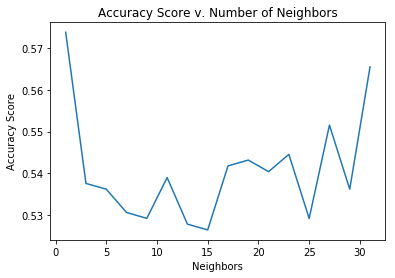

In [139]:
best_score = 0
neighs = []
score_list = []

for k in range(1, 32, 2):
    clf = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(clf, X1, y1, scoring='accuracy')
    mean_score = np.mean(scores)
    neighs.append(k)
    score_list.append(mean_score)
    
    if mean_score > best_score:
        best_score = mean_score
        neighbors = k
        
    
print(neighbors, "|", best_score)

# plotting results
plt.plot(neighs, score_list)
plt.xlabel('Neighbors')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score v. Number of Neighbors')

### ***Logistic Regression***

In [140]:
from sklearn.linear_model import LogisticRegression

In [141]:
clf = LogisticRegression()

scores = cross_val_score(clf, X1, y1, cv=10, scoring='accuracy')
print("Avg Logistic Regression cross val score:", round(np.mean(scores), 3))

Avg Logistic Regression cross val score: 0.525


In [142]:
np.logspace(-3,3,7)

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

In [144]:
## GRIDSEARCHING LOGISTIC REGRESSION MODEL
clf = LogisticRegression()

penalties = ['l1', 'l2']
c_range = np.logspace(-3,3,7)
class_weights = ['balanced', None]


param_grid = dict(class_weight=class_weights, C=c_range, penalty=penalties)

grid = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy', return_train_score=True)

grid.fit(X1, y1)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'class_weight': ['balanced', None], 'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [145]:
print(grid.best_estimator_)
print()
print("Best Score:", grid.best_score_)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Best Score: 0.6114206128133705
